# HW 11.

* Running the models may take minutes. This HW takes ~30 min to complete in computational time, so make sure you don't start it 1 hour before it is due.

* Tasks 2-4. should be done using the `sklearn` library, the last is a pure TensorFlow ([Keras is part of TensorFlow](https://github.com/keras-team/keras/releases#:~:text=since%20this%20release-,Keras%202.2.,well%20as%20Theano%20and%20CNTK)) example.

  * Never do `import keras` it only references `tf.keras` since version `2.4.0`!

* The example notebook was run in Google COLAB without any package installation. I advise you to use Google COLAB with a GPU instance for the last task.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPooling2D, Conv2D,BatchNormalization
from sklearn.preprocessing import LabelBinarizer, StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, accuracy_score
from random import randint

## 1. Load the CIFAR 10 dataset from the `tf.keras.datasets` API and train a `LogisticRegression` model on the dataset and predict all test outcomes with the `sklearn` API

* Create an image grid visualization of randomly selected images (9, 16) with labels.
* Preprocess the dataset for `sklearn`, scale [0-1], and also flatten each example to a vector.
* Use the `multi_class='multinomial'` option, describe what it means.
* Plot the ROC curves and AUC scores on the same figure.
* Calculate the accuracy of the classifier on the test set.

* Make your life easier - time is precious - and run all the algorithms with multiprocessing.

Hint:

* `from sklearn.preprocessing import LabelBinarizer` might be useful for you.

In [112]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape: {}\ty_train shape: {}'.format(x_train.shape, y_train.shape))
print('x_test shape: {}\ty_test shape: {}'.format(x_test.shape, y_test.shape))

x_train shape: (50000, 32, 32, 3)	y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)	y_test shape: (10000, 1)


In [22]:
# Set a variable with decoded classes
categ_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [23]:
# Random images plot function

def image_show(data,n_image, n_in_row=5):
  fig = plt.figure()
  for i in range(n_image):
    n_row = n_image / n_in_row
    modulo = n_image % n_in_row
    if modulo  == 0:
        n_row = int(n_row)
    else:
        n_row = int(round(n_row,1)) + 1
    # add subplot
    fig.add_subplot(n_row, n_in_row, i+1)
    # get random x_train index values
    idx = randint(0, data.shape[0])
    # display it
    plt.imshow(data[idx])
    plt.axis('off')

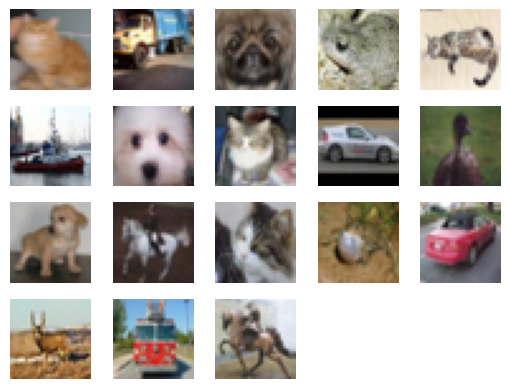

In [24]:
image_show(x_train, 18)

In [25]:
# Scale and flatten data
x_train_norm =x_train.reshape(50000, 32*32*3)/255
x_test_norm = x_test.reshape(10000, 32*32*3)/255

# Check
print('X_train:\n ', x_train_norm)
print('X_test:\n ', x_test_norm)

X_train:
  [[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.1372549  0.69803922 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.74117647 0.82745098 0.94117647 ... 0.76470588 0.74509804 0.67058824]
 [0.89803922 0.89803922 0.9372549  ... 0.63921569 0.63921569 0.63137255]]
X_test:
  [[0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255]
 [0.92156863 0.92156863 0.92156863 ... 0.72941176 0.78431373 0.78039216]
 [0.61960784 0.74509804 0.87058824 ... 0.02745098 0.03137255 0.02745098]
 ...
 [0.07843137 0.05882353 0.04705882 ... 0.09803922 0.07843137 0.18431373]
 [0.09803922 0.15686275 0.04705882 ... 0.36078431 0.47058824 0.31372549]
 [0.28627451 0.30588235 0.29411765 ... 0.10588235 0.10196078 0.10196078]]


In [28]:
print('X_train:\n ', x_train_norm.shape)
print('X_test:\n ', x_test_norm.shape)

X_train:
  (50000, 3072)
X_test:
  (10000, 3072)


In [26]:
print('X_test:\n ', x_test_norm)
# Encode labels
lb = LabelBinarizer()
lb.fit([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(lb.classes_)
y_train_oh = lb.transform(y_train)
y_test_oh = lb.transform(y_test)
# I tried to give these encoded labels to Logistic regression model, but I got an error, thus I used the not encoded version of labels.

X_test:
  [[0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255]
 [0.92156863 0.92156863 0.92156863 ... 0.72941176 0.78431373 0.78039216]
 [0.61960784 0.74509804 0.87058824 ... 0.02745098 0.03137255 0.02745098]
 ...
 [0.07843137 0.05882353 0.04705882 ... 0.09803922 0.07843137 0.18431373]
 [0.09803922 0.15686275 0.04705882 ... 0.36078431 0.47058824 0.31372549]
 [0.28627451 0.30588235 0.29411765 ... 0.10588235 0.10196078 0.10196078]]
[0 1 2 3 4 5 6 7 8 9]


In [27]:
y_train_oh[:5]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [17]:
# Prepare LogisticRegression model
lr_model = LogisticRegression(multi_class='multinomial', solver='saga')

# Fit the data
lr_model.fit(x_train_norm, y_train.ravel())

C:\Users\deuts\anaconda3\envs\Data_mining_and_machine_learning\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='saga')

In [18]:
# Predict labels for test set
y_pred = lr_model.predict_proba(x_test_norm)

In [19]:
y_pred[0]

array([0.00627438, 0.02216648, 0.07305231, 0.44430349, 0.02310223,
       0.06492716, 0.23331063, 0.00183275, 0.13021004, 0.00082054])

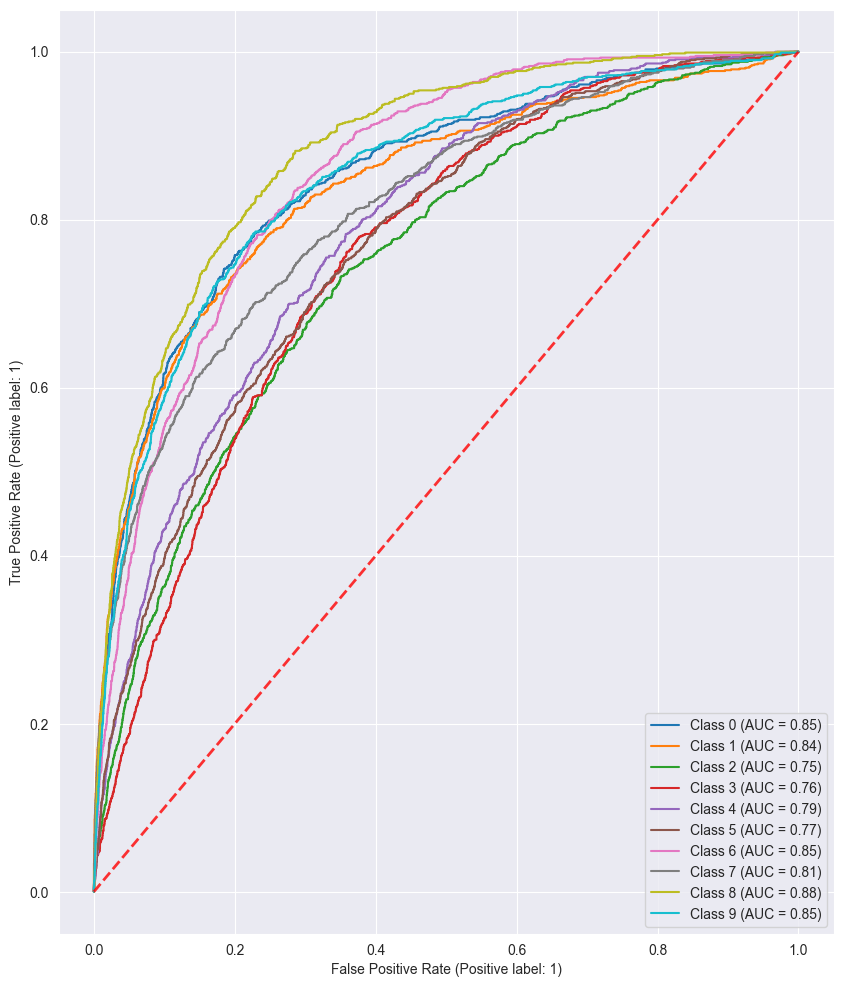

In [20]:
# Plot ROC curves of all classes separately

# Create figure
fig, ax = plt.subplots(figsize=(10, 12))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

In [21]:
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)
# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec = np.array([i.argmax() for i in y_pred])

In [22]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dec)

0.4034

## 2. Train an `SGDClassifier` regression model on the dataset and predict all the test outcomes with the `sklearn` API.

* Select the appropiate loss for this task, explain what this means.
* Time is precious, run multiple jobs at the same time.
* Plot the ROC curves and AUC scores on the same figure for the test set.
* Calculate the accuracy of the classifier.
* Why is this worse than the previous model?
* Describe the above model with your own words, how is it different than the logistic regression model?

In [23]:
# Build the model
sgd_clf_model = SGDClassifier(loss='modified_huber', n_jobs=8)

# Fit to the train set
sgd_clf_model.fit(x_train_norm, y_train.ravel())

SGDClassifier(loss='modified_huber', n_jobs=8)

In [24]:
# Predict y test labels
y_pred_sgd = sgd_clf_model.predict_proba(x_test_norm)

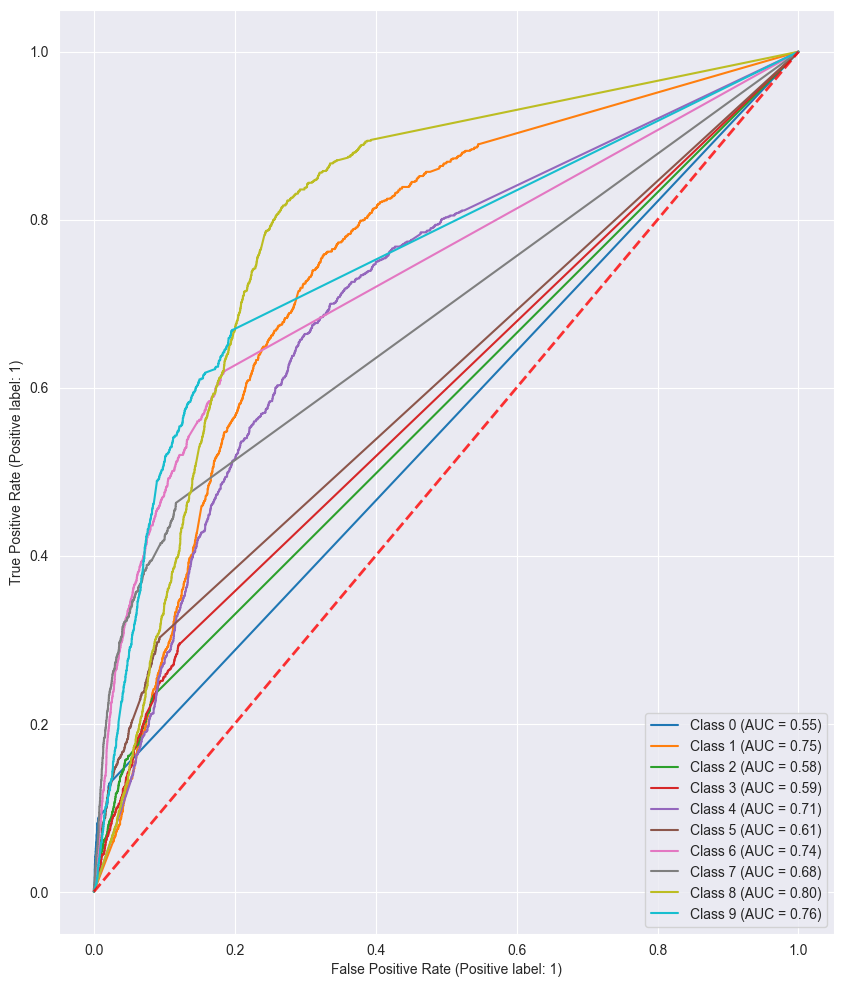

In [25]:
# Plot ROC curves of all classes separately

# Create figure
fig, ax = plt.subplots(figsize=(10, 12))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred_sgd])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

In [26]:
# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec_sgd = np.array([i.argmax() for i in y_pred_sgd])

In [27]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dec_sgd)

0.2872

SGD classifier is a linear model optimization method.
The SGD classifier applies Stoachistic Gradient descent that is not suitable for this data.
This is why it's worse

## 3. Train a RandomForest classifier

* Plot the ROC curve with AUC scores on the test set.
* Calculate accuracy of the classifier on the test set.
* Time is precious, run multiple jobs at the same time.

In [28]:
# Build model
rdf_clf = RandomForestClassifier(max_depth=10, n_jobs=12)

In [29]:
# Fit model
rdf_clf.fit(x_train_norm, y_train.ravel())

RandomForestClassifier(max_depth=10, n_jobs=12)

In [30]:
# Predict
y_pred_rdf = rdf_clf.predict_proba(x_test_norm)

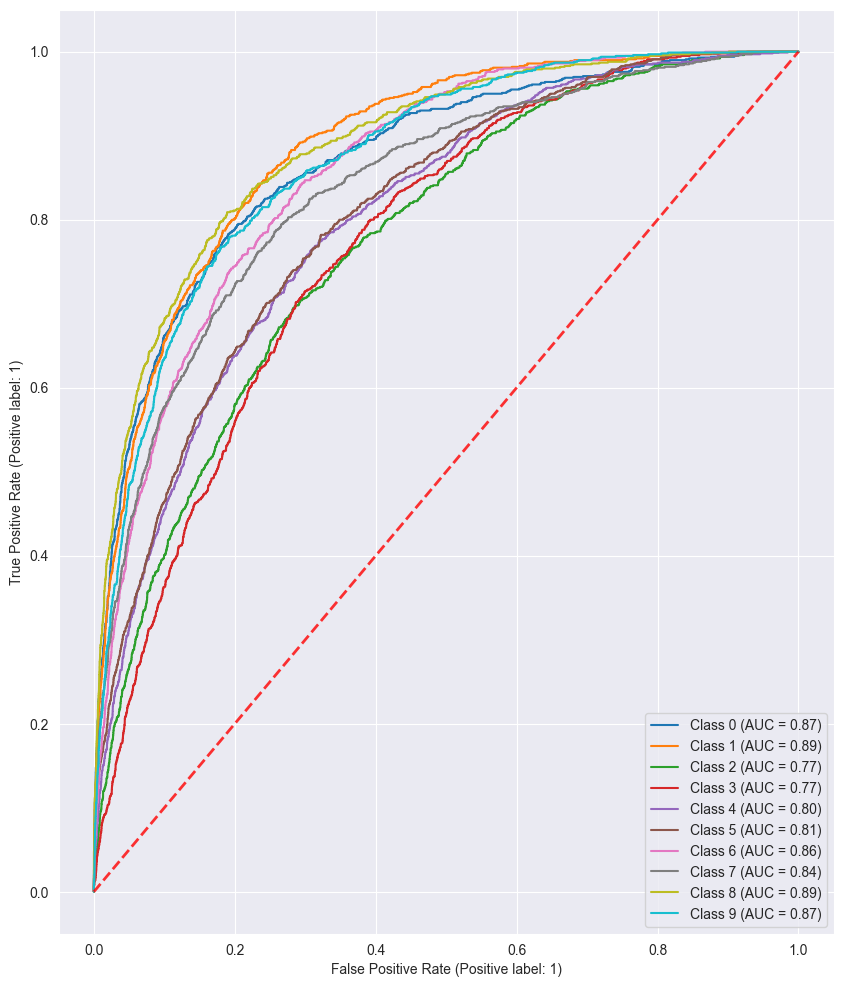

In [31]:
# Plot ROC curves
# Create figure
fig, ax = plt.subplots(figsize=(10, 12))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred_rdf])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

In [32]:
# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec_rdf = np.array([i.argmax() for i in y_pred_rdf])

In [33]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dec_rdf)

0.4265

## 4. Train an multi layer perceptron classifier

* use the `MLPClassifier` from `sklearn`
* Set its parameter to `max_iter = 30` or if you have time, set it for at least `100`. After `30` iterations the model does not converge but gives reasonable predictions (with default parameters).
* Plot the ROC curves with AUC scores for the test set.
* Calculate the accuracy of the model on the test set.



In [34]:
# Build the model
mlp_clf = MLPClassifier(max_iter=30)

In [35]:
# Fit it
mlp_clf.fit(x_train_norm, y_train.ravel())

C:\Users\deuts\anaconda3\envs\Data_mining_and_machine_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=30)

In [36]:
# Predict
y_pred_mlp = mlp_clf.predict_proba(x_test_norm)

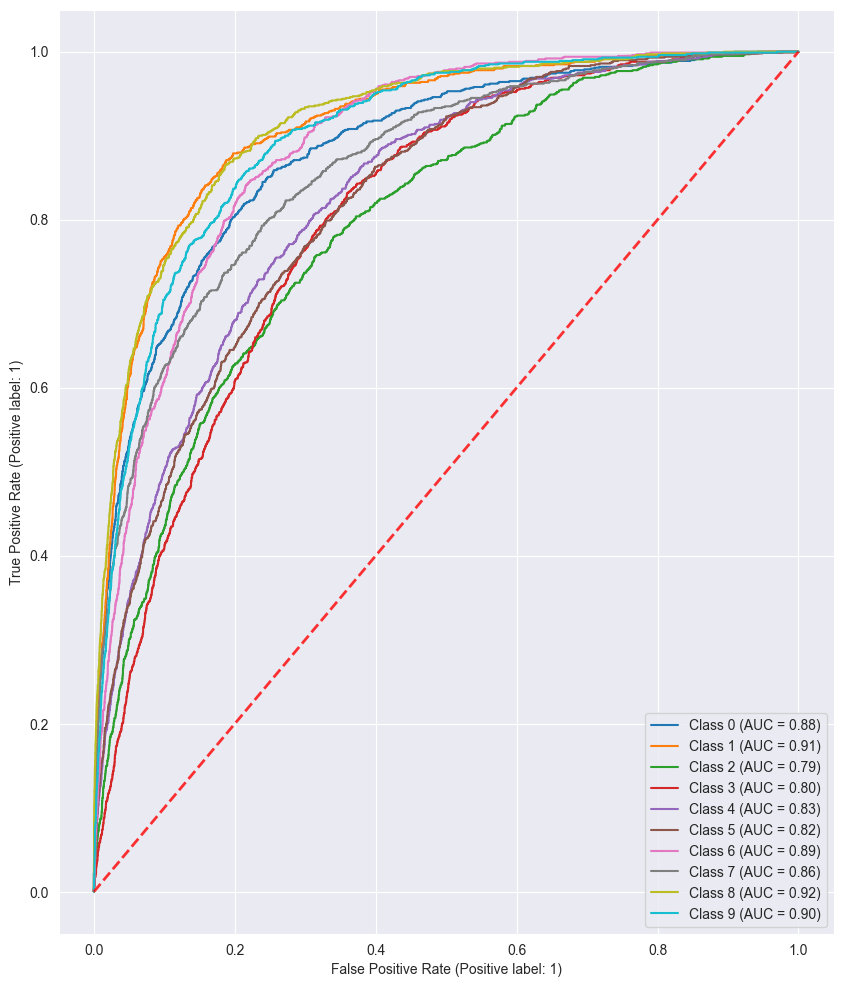

In [37]:
# Plot ROC curves
# Create figure
fig, ax = plt.subplots(figsize=(10, 12))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred_mlp])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

In [38]:
# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec_mlp = np.array([i.argmax() for i in y_pred_mlp])

In [39]:
# Calculate accuracy
accuracy_score(y_test,y_pred_dec_mlp)

0.4598

## 5. Train a ResNet50 CNN model on the dataset, utilize pre-trained weights and fine-tune for at least 3 epochs:

* training for 3 epochs should be enough to prove that this model is superior compared to others, train longer and you'll see exceptional results

Convert the dataset:

```python
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(32)
```

Hints:

* loading a pretrained model and letting its parameters be tunable

```python
backbone = tf.keras.applications.YOUR_MODEL_OF_CHOICE
backbone.trainable = True # DO NOT FORGET TO UNFREEZE IT
```

* defining your custom model with the pretrained backbone

```python
# YOUR_MODEL_OF_CHOICE here is ResNet50 (!) as described in the task description.

# Functional TensorFlow API
def my_own_model():
  input_placeholder = tf.keras.layers.Input(shape=(32, 32, 3))
  # DO NOT FORGET THE PROPER INPUT PREPROCESSING FOR THE BACKBONE
  x = tf.keras.applications.YOUR_MODEL_OF_CHOISE.preprocess_input(PROPER_INPUT)
  # PLEASE USE THE PROPER INPUT: (e.g. 8 bit input)
  x = backbone(x)
  # Here comes some more layers
  # and flattening at the end if needed!
  out = # layer outputting the specified number of classes
        # with or without a softmax activation, later on
        # the choice of the loss depends on this
  model = tf.keras.models.Model(inputs=inp, outputs=out)
  return model
```

In [2]:
import tensorflow.keras as K
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
def preprocess_data(X, Y):
    """
    a function that trains a convolutional neural network to classify the
    CIFAR 10 dataset
    :param X: X is a numpy.ndarray of shape (m, 32, 32, 3) containing the
    CIFAR 10 data, where m is the number of data points
    :param Y: Y is a numpy.ndarray of shape (m,) containing the CIFAR 10
    labels for X
    :return: X_p, Y_p
        X_p is a numpy.ndarray containing the preprocessed X
        Y_p is a numpy.ndarray containing the preprocessed Y
    """
    X_p = K.applications.resnet50.preprocess_input(X)
    Y_p = K.utils.to_categorical(Y, 10)
    return X_p, Y_p

In [4]:
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
print((x_train.shape, y_train.shape))
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)
print((x_test.shape, y_test.shape))

((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 10))


In [5]:
input_t = K.Input(shape=(64, 64, 3))
res_model = K.applications.ResNet50(include_top=False,
                                    weights="imagenet",
                                    input_tensor=input_t)

In [6]:
for layer in res_model.layers:
    layer.trainable = False
    # Check the freezed was done ok
for i, layer in enumerate(res_model.layers):
    print(i, layer.name, "-", layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [10]:
def my_own_model():
    to_res = (64, 64)
    input_t = K.Input(shape=(64, 64, 3))
    res_model = K.applications.ResNet50(include_top=False,
                                        weights="imagenet",
                                        input_tensor=input_t)
    for layer in res_model.layers:
        layer.trainable = False
    # Check the freezed was done ok
    for i, layer in enumerate(res_model.layers):
        print(i, layer.name, "-", layer.trainable)

    model = K.models.Sequential()
    model.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res)))
    model.add(res_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(100, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(10, activation='softmax'))
    return model

In [11]:
mymodel = my_own_model()

0 input_3 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [12]:
mymodel.compile(loss='categorical_crossentropy',
              optimizer=K.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

In [13]:
history = mymodel.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 307s 194ms/step - loss: 1.3514 - accuracy: 0.5468 - val_loss: 0.8225 - val_accuracy: 0.7247
Epoch 2/10
1563/1563 [==============================] - 303s 194ms/step - loss: 0.9601 - accuracy: 0.6809 - val_loss: 0.7396 - val_accuracy: 0.7540
Epoch 3/10
1563/1563 [==============================] - 306s 196ms/step - loss: 0.8773 - accuracy: 0.7106 - val_loss: 0.6958 - val_accuracy: 0.7703
Epoch 4/10
1563/1563 [==============================] - 306s 195ms/step - loss: 0.8215 - accuracy: 0.7298 - val_loss: 0.6661 - val_accuracy: 0.7795
Epoch 5/10
1563/1563 [==============================] - 315s 202ms/step - loss: 0.7802 - accuracy: 0.7445 - val_loss: 0.6500 - val_accuracy: 0.7832
Epoch 6/10
1563/1563 [==============================] - 354s 227ms/step - loss: 0.7518 - accuracy: 0.7516 - val_loss: 0.6341 - val_accuracy: 0.7882
Epoch 7/10
1563/1563 [==============================] - 363s 232ms/step - loss: 0.7265 - accuracy: 0.7612 - val_

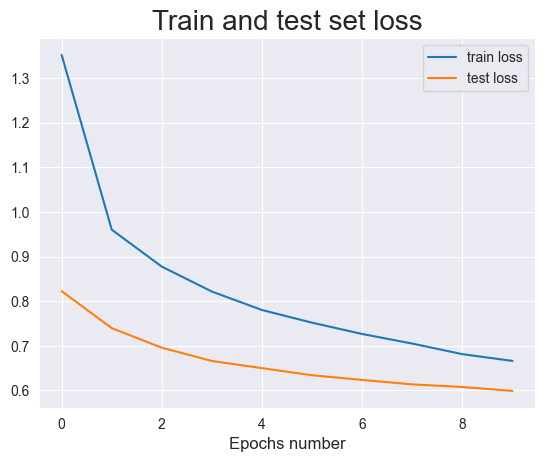

In [14]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
model_acc = history.history['accuracy']
model_acc_test = history.history['val_accuracy']

epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.title('Train and test set loss', fontsize=20)
plt.xlabel('Epochs number', fontsize=12)
plt.legend()

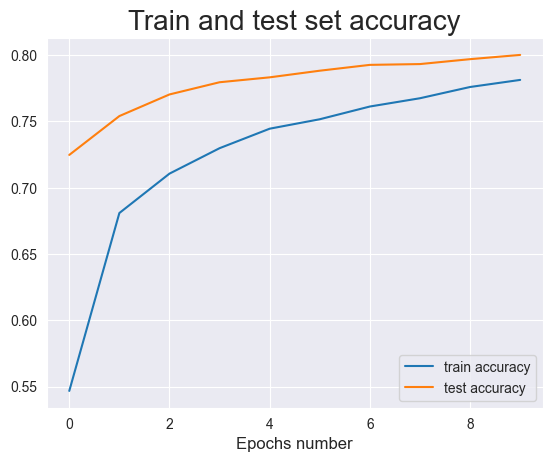

In [15]:
plt.plot(epochs, model_acc, label='train accuracy')
plt.plot(epochs, model_acc_test, label='test accuracy')
plt.title('Train and test set accuracy', fontsize=20)
plt.xlabel('Epochs number', fontsize=12)
plt.legend()